<a href="https://colab.research.google.com/github/KeysiYTS/amazon-rainforest-degradation/blob/dev/rainforest_degradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About


[Kaggle dataset](https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation)


**'inpebrazilianamazonfires1999_2019'** : amount of fire outbreaks in Brazilian Amazon by state, month and year, from 1999 to 2019. The original data are public and were extracted from INPE website on December 13th 2019, always from the filtering for the reference salellite and aggregated using Postgres SQL so that you could work with lighter files.
Program: BDQ (Banco de Dados de Queimadas, or Fires Database).
Methodology: detects fire outbreaks through satellite images, updated every 3 hours.

**'defarea2004_2019'** : deforestation area (km²) by year and state, from 2004 to 2019. The data are public and were extracted from INPE website on December 16th 2019. It was already aggregated, so, no data process was made.
Program: PRODES (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite, or Brazilian Amazon Rainforest Monitoring Program by Satellite).
Methodology: maps primary forest loss using satellite imagery, with 20 to 30 meters of spatial resolution and 16-day revisit rate, in a combination that seeks to minimize the problem of cloud cover and ensure interoperability criteria.

**'elninolanina1999_2019'** : Data about start year, end year, and severity of 2 of the most important climatic phenomena.
Data were extracted from Golden Gate Weather Services on December 20th 2019 and were unpivoted.

In [ ]:
!pip install geopandas --quiet

     |████████████████████████████████| 1.0MB 5.0MB/s 
     |████████████████████████████████| 15.4MB 187kB/s 
     |████████████████████████████████| 6.6MB 33.6MB/s 


# Libs

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
#import geopandas as gpd

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
mpl.rcParams['figure.figsize'] = (10,5)

# Importing data

In [ ]:
filepath_deforest_14a19 = '/content/drive/MyDrive/0. Machine Learning/Projetos/RainForest_Degradation/def_area_2004_2019.csv'

In [ ]:
filepath_elnino = '/content/drive/MyDrive/0. Machine Learning/Projetos/RainForest_Degradation/el_nino_la_nina_1999_2019.csv'

In [ ]:
filepath_amazonfires = '/content/drive/MyDrive/0. Machine Learning/Projetos/RainForest_Degradation/inpe_brazilian_amazon_fires_1999_2019.csv'

# Analyzing Deforestation

In [ ]:
deforest_14a19 = pd.read_csv(filepath_deforest_14a19)
deforest_14a19.head()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


It's not clear to me what the column 'AMZ LEGAL' is

In [ ]:
deforest_14a19.describe()

,Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2011.500000,357.625000,776.562500,38.500000,519.875000,2691.562500,3923.625000,1392.437500,243.187500,77.562500,10020.937500
std,4.760952,172.476037,300.648625,23.557023,316.705305,2940.367595,1945.802487,943.567413,150.567468,63.238141,6112.467134
min,2004.000000,167.000000,405.000000,8.000000,209.000000,757.000000,1741.000000,435.000000,121.000000,21.000000,4571.000000
25%,2007.750000,256.250000,568.000000,24.000000,257.750000,1108.750000,2411.250000,842.000000,139.000000,46.750000,6365.250000
50%,2011.500000,292.500000,661.000000,30.500000,399.500000,1525.500000,3389.000000,1189.500000,198.500000,57.500000,7500.000000
75%,2015.250000,409.500000,1012.000000,47.750000,722.750000,2823.000000,5546.250000,1434.750000,269.250000,82.250000,11966.000000
max,2019.000000,728.000000,1421.000000,100.000000,1271.000000,11814.000000,8870.000000,3858.000000,617.000000,271.000000,27772.000000


In [ ]:
deforest_14a19.columns

Index(['Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

## Analyzing by states

In [ ]:
deforest_14a19_states = deforest_14a19.drop(columns=['Ano/Estados', 'AMZ LEGAL'])
deforest_14a19_states.head()

,AC,AM,AP,MA,MT,PA,RO,RR,TO
0,728,1232,46,755,11814,8870,3858,311,158
1,592,775,33,922,7145,5899,3244,133,271
2,398,788,30,674,4333,5659,2049,231,124
3,184,610,39,631,2678,5526,1611,309,63
4,254,604,100,1271,3258,5607,1136,574,107


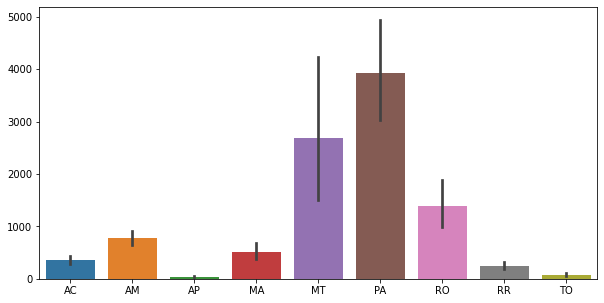

In [ ]:
sns.barplot(data=deforest_14a19_states)
plt.show()

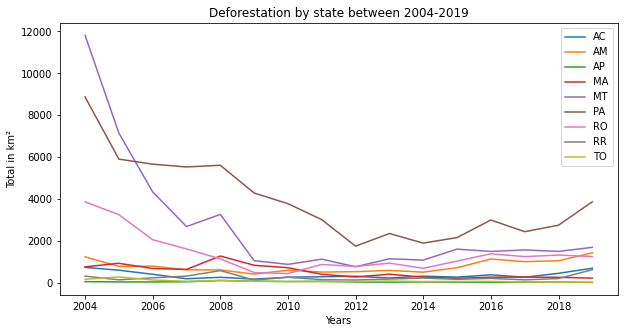

In [ ]:
for state in deforest_14a19_states.columns:
  sns.lineplot(x=deforest_14a19['Ano/Estados'], y=deforest_14a19[state])

plt.legend(deforest_14a19_states.columns)
plt.title("Deforestation by state between 2004-2019")
plt.ylabel("Total in km²")
plt.xlabel('Years')
plt.show()

Mato Grosso leads the ranking in 2004 followed by Pará. By 2005, There's a "drastic" reduction in Mato Grosso's deforestation endeavour and only between 2008 and 2012 there's a siginificant drop in Pará.

### CREATE MAP VIZ HERE

## Progression of deforestation yearly

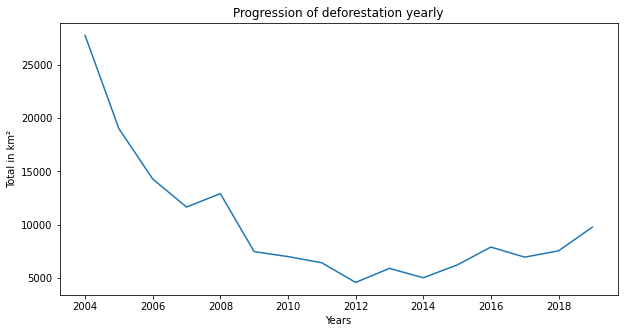

In [ ]:
sns.lineplot(data=deforest_14a19, x='Ano/Estados', y='AMZ LEGAL' )
plt.title("Progression of deforestation yearly")
plt.xlabel('Years')
plt.ylabel("Total in km²")
plt.show()

## Modeling estimator

### Separating X and Y

In [ ]:
x = deforest_14a19.drop(columns='Ano/Estados')
y = deforest_14a19['AMZ LEGAL']

### Separating training and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    random_state=64,
                                                    test_size=.3)

In [ ]:
liregression = LinearRegression()

In [ ]:
liregression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = liregression.predict(x_test)

In [ ]:
accuracy = liregression.score(x_test, y_test)

In [ ]:
print('The model Accuracy is: %.2f%%' % (accuracy*100))

The model Accuracy is: 100.00%


In [ ]:
predictions

array([ 4571.,  6947.,  5012.,  5891., 14286.])

# Analyzing Forest Fires

In [ ]:
amazon_fires = pd.read_csv(filepath_amazonfires)
amazon_fires.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [ ]:
amazon_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB


In [ ]:
amazon_fires.describe()

,year,month,latitude,longitude,firespots
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000
mean,2009.267110,6.704848,-5.439282,-56.510314,1167.417776
std,5.963029,3.431949,4.852439,7.382619,2959.558714
min,1999.000000,1.000000,-14.431908,-73.085000,1.000000
25%,2004.000000,4.000000,-9.946974,-62.376004,16.000000
50%,2009.000000,7.000000,-5.808292,-55.876480,121.000000
75%,2014.000000,10.000000,-2.595169,-50.396154,755.000000
max,2019.000000,12.000000,4.151000,-44.188000,37926.000000


In [ ]:
amazon_fires['state'].value_counts()

MATO GROSSO    252
AMAZONAS       250
PARA           250
RONDONIA       246
RORAIMA        243
MARANHAO       241
TOCANTINS      221
ACRE           204
AMAPA          197
Name: state, dtype: int64

In [ ]:
a = pd.read_csv(filepath_elnino)
a.head()

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate
